# WORKING WITH TIMESTAMPS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../project_week_four/dc_bikes.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1


In [4]:
df.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count            0
dtype: int64

In [5]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual        float64
registered    float64
count           int64
dtype: object

In [6]:
# 'datetime' type (string) must be transformed into 

In [7]:
len(df.index)

17379

### Examine whether the bicycle count shows any time-related patterns.

#### 1. Extract features like hour, month, etc. from the datetime column into their own columns

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [9]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual               float64
registered           float64
count                  int64
dtype: object

In [10]:
df_dt1 = pd.read_csv('../project_week_four/dc_bikes.csv', index_col = 0, parse_dates=True)

In [11]:
df_dt1.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1


In [12]:
df['season'].unique()

array([1, 2, 3, 4])

In [13]:
df['holiday'].unique()

array([0, 1])

In [14]:
df['workingday'].unique()

array([0, 1])

In [15]:
df_dt1.index.year

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', name='datetime', length=17379)

In [16]:
df_dt1['year'] = df_dt1.index.year

In [17]:
df_dt1.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='datetime', length=17379)

In [18]:
df_dt1['month_number'] = df_dt1.index.month

In [19]:
df_dt1.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', name='datetime', length=17379)

In [20]:
df_dt1['month'] = df_dt1.index.month_name()

In [21]:
df_dt1.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            31, 31, 31, 31, 31, 31, 31, 31, 31, 31],
           dtype='int64', name='datetime', length=17379)

In [22]:
df_dt1['day_of_month'] = df_dt1.index.day

In [23]:
df_dt1.index.weekday

Int64Index([5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='datetime', length=17379)

In [24]:
df_dt1.index.day_name()

Index(['Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Saturday', 'Saturday', 'Saturday',
       ...
       'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday'],
      dtype='object', name='datetime', length=17379)

In [25]:
df_dt1['week_day'] = df_dt1.index.day_name()

In [26]:
df_dt1.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='datetime', length=17379)

In [27]:
df_dt1['hour_day'] = df_dt1.index.hour

In [28]:
df_dt1['season_name']= df_dt1['season'].replace({1:'winter', 2:'spring', 3:'summer', 4:'autumn'})

In [29]:
df_dt1

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month_number,month,day_of_month,week_day,hour_day,season_name
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,2011,1,January,1,Saturday,0,winter
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,2011,1,January,1,Saturday,1,winter
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2011,1,January,1,Saturday,2,winter
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,2011,1,January,1,Saturday,3,winter
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,2011,1,January,1,Saturday,4,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,2012,12,December,31,Monday,19,winter
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,2012,12,December,31,Monday,20,winter
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,2012,12,December,31,Monday,21,winter


#### 2. Plot small sections of the count data over time (1 day, 1 week, etc.)

### 2.1.  Day Plot:

In [30]:
df_dt1.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=17379, freq=None)

In [31]:
df_dt1.loc['2011-01-01'].head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month_number,month,day_of_month,week_day,hour_day,season_name
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,2011,1,January,1,Saturday,0,winter
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,2011,1,January,1,Saturday,1,winter
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2011,1,January,1,Saturday,2,winter
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,2011,1,January,1,Saturday,3,winter
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,2011,1,January,1,Saturday,4,winter


In [32]:
#1 day count: January 1st, 2011:

day_count = df_dt1.loc['2011-01-01']['count'].sum()
day_count

985

In [33]:
df_dt1.loc['2011-01-01']['count'].max()

110

In [34]:
# Option 1: Creat a new data frame only with the column 'count' and the index:

# 1. Create the data series:

ds_day1= df_dt1.loc['2011-01-01']['count']
ds_day1.head()

datetime
2011-01-01 00:00:00    16
2011-01-01 01:00:00    40
2011-01-01 02:00:00    32
2011-01-01 03:00:00    13
2011-01-01 04:00:00     1
Name: count, dtype: int64

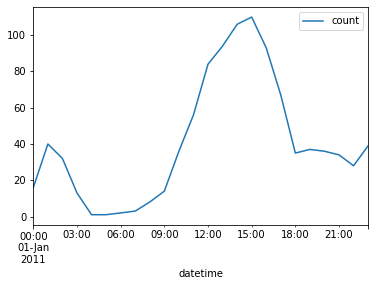

In [35]:
# 2. Create the plot from the data series:

ds_day1.plot(x= 'datetime', y= 'count',label= 'count')
plt.legend()
plt.show()

In [36]:
# Option 2: Creat a new data frame only with the columns I need:

# 1. Create the data frame with the needed columns:

df_day= df_dt1.loc['2011-01-01'][['count','hour_day']]
df_day.head()

,count,hour_day
datetime,,
2011-01-01 00:00:00,16,0
2011-01-01 01:00:00,40,1
2011-01-01 02:00:00,32,2
2011-01-01 03:00:00,13,3
2011-01-01 04:00:00,1,4


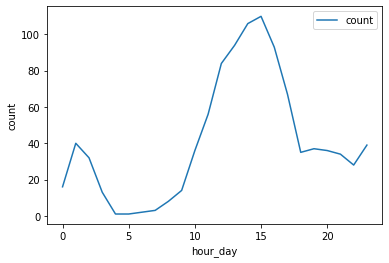

In [37]:
# 2. Plot the information from the columns. 

#plt.figure(figsize= (6,10), dpi = 80)
sns.lineplot(x= 'hour_day', y= 'count', data= df_day,label= 'count')
plt.legend()
plt.show()

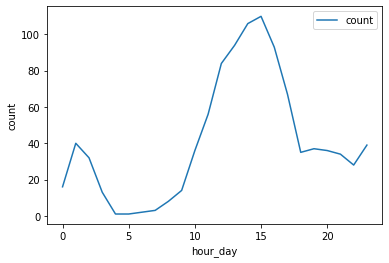

In [38]:
# Option 3: Plot directly from the original data frame:

#plt.figure(figsize= (8,10), dpi = 80)

# 1. Extract the information from the day needed: 

day_one= df_dt1.loc['2011-01-01']

# 2. Use this variable in the plotting code line:

sns.lineplot(x= day_one['hour_day'], y = df_dt1['count'], data= df_dt1, label= 'count')

plt.show()

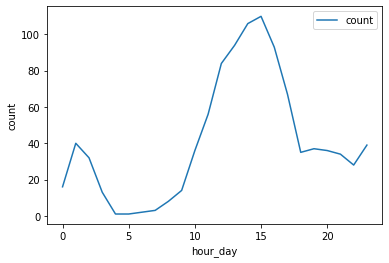

In [39]:
# Alternative to Option 3: Do not create a new variable, use the .loc directly
# on the ploting line:

sns.lineplot(x= df_dt1.loc['2011-01-01']['hour_day'], y = df_dt1['count'], data= df_dt1, label= 'count' )
plt.legend()
plt.show()

### 2.2.  Week Plot:

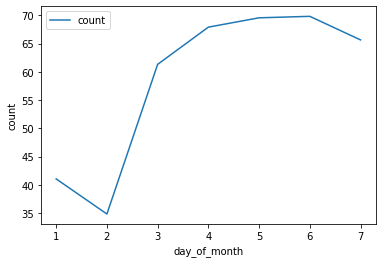

In [40]:
week_1 = df_dt1.loc['2011-01-01':'2011-01-07']

sns.lineplot(x= week_1['day_of_month'], y = week_1['count'], data= df_dt1, label= 'count', ci = None )
plt.legend()
plt.show()

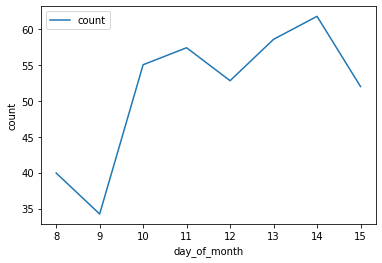

In [41]:
week_2 = df_dt1.loc['2011-01-08':'2011-01-15']

sns.lineplot(x= week_2['day_of_month'], y = week_2['count'], data= df_dt1, label= 'count',ci = None )
plt.legend()
plt.show()

### 2.3.  Month Plot:

In [42]:
january = df_dt1[(df_dt1['month'] == 'January') & (df_dt1['year'] == 2011)]
january

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month_number,month,day_of_month,week_day,hour_day,season_name
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,2011,1,January,1,Saturday,0,winter
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,2011,1,January,1,Saturday,1,winter
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2011,1,January,1,Saturday,2,winter
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,2011,1,January,1,Saturday,3,winter
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,2011,1,January,1,Saturday,4,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-31 19:00:00,1,0,1,1,12.30,15.910,61,7.0015,NaN,NaN,137,2011,1,January,31,Monday,19,winter
2011-01-31 20:00:00,1,0,1,3,6.56,8.335,59,11.0014,NaN,NaN,32,2011,1,January,31,Monday,20,winter
2011-01-31 21:00:00,1,0,1,3,6.56,9.850,59,6.0032,NaN,NaN,23,2011,1,January,31,Monday,21,winter


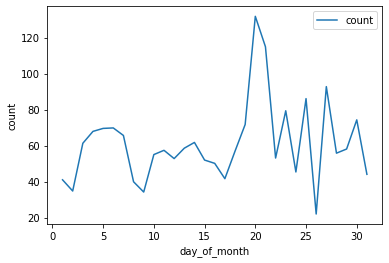

In [43]:
sns.lineplot(x= january['day_of_month'], y = df_dt1['count'], data= df_dt1, label= 'count',ci = None )
plt.legend()
plt.show()

### 2.4.  Quarter Plot:

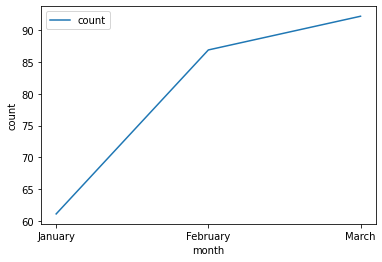

In [44]:
Q1_2011 = df_dt1.loc['2011-01-01':'2011-03-31']
sns.lineplot(x= Q1_2011['month'], y = Q1_2011['count'], data= df_dt1, label= 'count',ci = None )
plt.legend()
plt.show()

In [45]:
Q1_2011_2 = df_dt1[((df_dt1['month'] == 'January') | (df_dt1['month'] == 'February')
                   | (df_dt1['month'] == 'March')) & (df_dt1['year'] == 2011)]
Q1_2011_2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month_number,month,day_of_month,week_day,hour_day,season_name
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,2011,1,January,1,Saturday,0,winter
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,2011,1,January,1,Saturday,1,winter
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2011,1,January,1,Saturday,2,winter
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,2011,1,January,1,Saturday,3,winter
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,2011,1,January,1,Saturday,4,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-03-31 19:00:00,2,0,1,2,12.30,15.150,87,8.9981,NaN,NaN,136,2011,3,March,31,Thursday,19,spring
2011-03-31 20:00:00,2,0,1,3,11.48,12.880,93,19.0012,NaN,NaN,46,2011,3,March,31,Thursday,20,spring
2011-03-31 21:00:00,2,0,1,2,11.48,13.635,93,11.0014,NaN,NaN,70,2011,3,March,31,Thursday,21,spring


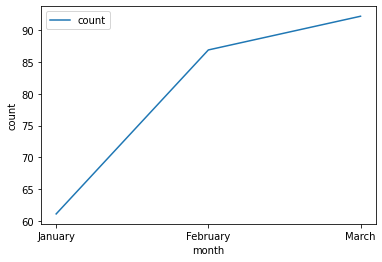

In [46]:
sns.lineplot(x= Q1_2011_2['month'], y = Q1_2011_2['count'], data= df_dt1, label= 'count',ci = None )
plt.legend()
plt.show()

### 2.5.  Semester Plot:

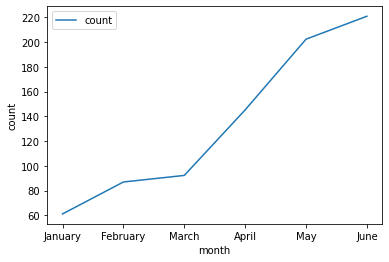

In [47]:
S1_2011 = df_dt1.loc['2011-01-01':'2011-06-30']
sns.lineplot(x= S1_2011['month'], y = S1_2011['count'], data= df_dt1, label= 'count',ci = None )
plt.legend()
plt.show()

### 2.6.  Year Plot:

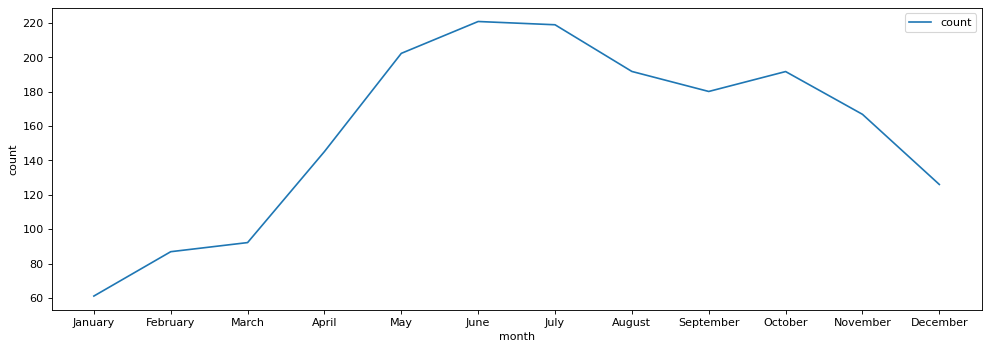

In [48]:
plt.figure(figsize= (15,5), dpi = 80)

Y1_2011 = df_dt1.loc['2011-01-01':'2011-12-31']
sns.lineplot(x= Y1_2011['month'], y = Y1_2011['count'], data= df_dt1, label= 'count',ci = None )
plt.legend()
plt.show()

### 2.7.  Two Years Plot:

In [49]:
df_dt1['rolling_mean'] = df_dt1['count'].rolling(window=1000).mean()

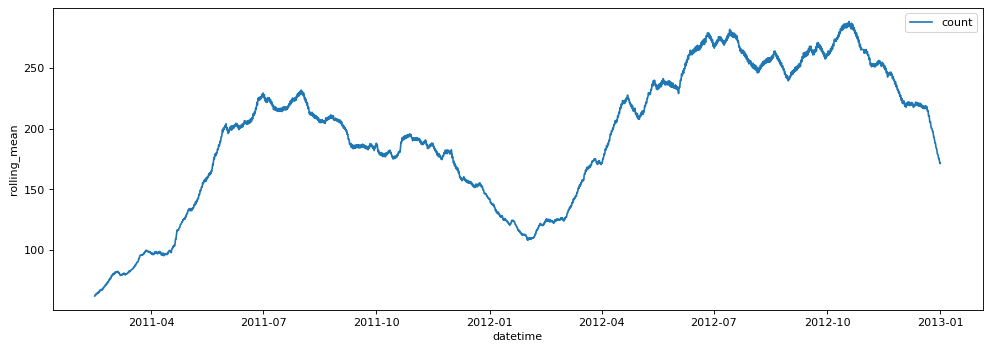

In [50]:
plt.figure(figsize= (15,5), dpi = 80)

sns.lineplot(x= df_dt1.index, y = df_dt1['rolling_mean'], data= df_dt1, label= 'count',ci = None )
plt.legend()
plt.show()

In [51]:
df_dt1['rolling_mean'].max()

288.347

In [52]:
df_dt1['month'][df_dt1['rolling_mean'] == df_dt1['rolling_mean'].max()]

datetime
2012-10-18 22:00:00    October
Name: month, dtype: object

In [53]:
df_dt1['rolling_mean'].min()

62.14

In [54]:
df_dt1['month'][df_dt1['rolling_mean'] == df_dt1['rolling_mean'].min()]

datetime
2011-02-14 07:00:00    February
Name: month, dtype: object

### 3. Create a part_of_day column for the bike data. It should have the following labels: morning, afternoon, evening, night

In [55]:
df_dt1['hour_of_day'] = df_dt1.index.hour
df_dt1.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month_number,month,day_of_month,week_day,hour_day,season_name,rolling_mean,hour_of_day
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,2011,1,January,1,Saturday,0,winter,NaN,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,2011,1,January,1,Saturday,1,winter,NaN,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2011,1,January,1,Saturday,2,winter,NaN,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,2011,1,January,1,Saturday,3,winter,NaN,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,2011,1,January,1,Saturday,4,winter,NaN,4


In [56]:
df_dt1['hour_of_day'].min(), df_dt1['hour_of_day'].max() 

(0, 23)

#### Option 1: dividing the day in 3 segments as done in Latinameria: Morning, Afternoon, Evening

In [57]:
time_labels = ['evening_2','morning', 'afternoon', 'evening']
bin_boundaries = [-0.1, 4.9, 12, 18, 23.9]

In [58]:
df_dt1['part_of_day']= pd.cut(df_dt1['hour_of_day'], bins=bin_boundaries, labels=time_labels)

In [59]:
df_dt1.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,year,month_number,month,day_of_month,week_day,hour_day,season_name,rolling_mean,hour_of_day,part_of_day
datetime,,,,,,,,,,,,,,,,,,,,,
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,...,2012,12,December,31,Monday,19,winter,171.682,19,evening
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,...,2012,12,December,31,Monday,20,winter,171.764,20,evening
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,...,2012,12,December,31,Monday,21,winter,171.819,21,evening
2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,...,2012,12,December,31,Monday,22,winter,171.852,22,evening
2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,NaN,...,2012,12,December,31,Monday,23,winter,171.869,23,evening


In [60]:
df_dt2 = df_dt1[df_dt1['part_of_day']== 'evening_2'].replace({'evening_2': 'evening'})
df_dt2.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,year,month_number,month,day_of_month,week_day,hour_day,season_name,rolling_mean,hour_of_day,part_of_day
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,...,2011,1,January,1,Saturday,0,winter,NaN,0,evening
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,...,2011,1,January,1,Saturday,1,winter,NaN,1,evening
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,...,2011,1,January,1,Saturday,2,winter,NaN,2,evening
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,...,2011,1,January,1,Saturday,3,winter,NaN,3,evening
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,...,2011,1,January,1,Saturday,4,winter,NaN,4,evening


In [61]:
df_dt2['part_of_day'].unique()

['evening']
Categories (3, object): ['morning' < 'afternoon' < 'evening']

#### Option 2: dividing the day in 4 segments: Morning, Afternoon, Evening, night.

In [62]:
time_labels = ['night','morning', 'afternoon', 'evening']
bin_boundaries = [-0.1, 4.9, 12, 18, 23.9]

In [63]:
df_dt1['part_of_day']= pd.cut(df_dt1['hour_of_day'], bins=bin_boundaries, labels=time_labels)

In [64]:
df_dt1.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,year,month_number,month,day_of_month,week_day,hour_day,season_name,rolling_mean,hour_of_day,part_of_day
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,...,2011,1,January,1,Saturday,0,winter,NaN,0,night
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,...,2011,1,January,1,Saturday,1,winter,NaN,1,night
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,...,2011,1,January,1,Saturday,2,winter,NaN,2,night
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,...,2011,1,January,1,Saturday,3,winter,NaN,3,night
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,...,2011,1,January,1,Saturday,4,winter,NaN,4,night


In [65]:
df_dt1.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,year,month_number,month,day_of_month,week_day,hour_day,season_name,rolling_mean,hour_of_day,part_of_day
datetime,,,,,,,,,,,,,,,,,,,,,
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,...,2012,12,December,31,Monday,19,winter,171.682,19,evening
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,...,2012,12,December,31,Monday,20,winter,171.764,20,evening
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,...,2012,12,December,31,Monday,21,winter,171.819,21,evening
2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,...,2012,12,December,31,Monday,22,winter,171.852,22,evening
2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,NaN,...,2012,12,December,31,Monday,23,winter,171.869,23,evening


### 4. Group by a time feature and observe grouped means

#### Group by a time feature and observe grouped means

In [66]:
df_dt1.groupby('year')['temp'].mean()

year
2011    20.051822
2012    20.697818
Name: temp, dtype: float64

In [67]:
df_dt1.groupby(['year','month'])['temp'].mean()

year  month    
2011  April        19.311627
      August       28.927715
      December     13.336896
      February     11.642989
      January       8.093924
      July         31.101586
      June         28.416417
      March        13.580548
      May          23.666478
      November     16.490097
      October      19.265034
      September    25.129512
2012  April        19.230028
      August       29.183844
      December     13.244879
      February     12.932775
      January      11.275277
      July         30.846989
      June         27.679556
      March        18.430686
      May          25.106989
      November     13.782396
      October      20.718898
      September    25.423417
Name: temp, dtype: float64

In [68]:
df_dt1[(df_dt1['month'] == 'January') | (df_dt1['month'] == 'February')].groupby('year')['temp'].mean()


year
2011     9.816694
2012    12.075687
Name: temp, dtype: float64

In [69]:
df_dt1[(df_dt1['month'] == 'June') | (df_dt1['month'] == 'July')].groupby('year')['temp'].mean()


year
2011    29.781011
2012    29.289235
Name: temp, dtype: float64

In [70]:
df_dt1.groupby('year')['humidity'].mean()

year
2011    64.342973
2012    61.119304
Name: humidity, dtype: float64

In [71]:
df_dt1.groupby('year')['windspeed'].mean()

year
2011    12.808542
2012    12.665271
Name: windspeed, dtype: float64

In [72]:
df_dt1.groupby('year')['count'].sum()

year
2011    1367721
2012    1910179
Name: count, dtype: int64

### Bonus

#### Make subset of data which only includes January 2011 observation. Add rolling average of the count to the new subset dataframe and plot the rolling average and count versus time.

In [73]:
january_2011= df_dt1[((df_dt1['month'] == 'January') & (df_dt1['year'] == 2011))]

In [74]:
rolling_mean_jan_2011 = january_2011['count'].rolling(window=10).mean()

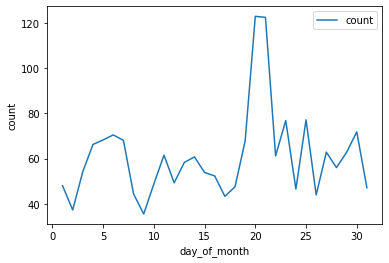

In [75]:
#plt.figure(figsize= (15,5), dpi = 80)

sns.lineplot(x= january_2011['day_of_month'], y = rolling_mean_jan_2011, data= df_dt1, label= 'count',ci = None )
plt.legend()
plt.show()

# DATA WRANGLING

#### Unlike in the gapminder datasets the bike dataset has many values in the dataframe. Use pivot_table to create a pivot table of traffic density over weekdays and/or hours. Identify confounding factors in the dataset (e.g. workdays vs weekdays).

In [76]:
df_dt1.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,year,month_number,month,day_of_month,week_day,hour_day,season_name,rolling_mean,hour_of_day,part_of_day
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,...,2011,1,January,1,Saturday,0,winter,NaN,0,night
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,...,2011,1,January,1,Saturday,1,winter,NaN,1,night
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,...,2011,1,January,1,Saturday,2,winter,NaN,2,night
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,...,2011,1,January,1,Saturday,3,winter,NaN,3,night
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,...,2011,1,January,1,Saturday,4,winter,NaN,4,night


In [77]:
# Drop option to reduce the table

df_dt2 = df_dt1.drop(['season', 'holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','hour_day','hour_of_day','part_of_day','rolling_mean'], axis=1)
df_dt2

,count,year,month_number,month,day_of_month,week_day,season_name
datetime,,,,,,,
2011-01-01 00:00:00,16,2011,1,January,1,Saturday,winter
2011-01-01 01:00:00,40,2011,1,January,1,Saturday,winter
2011-01-01 02:00:00,32,2011,1,January,1,Saturday,winter
2011-01-01 03:00:00,13,2011,1,January,1,Saturday,winter
2011-01-01 04:00:00,1,2011,1,January,1,Saturday,winter
...,...,...,...,...,...,...,...
2012-12-31 19:00:00,156,2012,12,December,31,Monday,winter
2012-12-31 20:00:00,104,2012,12,December,31,Monday,winter
2012-12-31 21:00:00,67,2012,12,December,31,Monday,winter


In [78]:
# Selecting columns option to reduce the table

df_dt2_2= df_dt1[['count','year','month','day_of_month','week_day','month_number']]
df_dt2_2

,count,year,month,day_of_month,week_day,month_number
datetime,,,,,,
2011-01-01 00:00:00,16,2011,January,1,Saturday,1
2011-01-01 01:00:00,40,2011,January,1,Saturday,1
2011-01-01 02:00:00,32,2011,January,1,Saturday,1
2011-01-01 03:00:00,13,2011,January,1,Saturday,1
2011-01-01 04:00:00,1,2011,January,1,Saturday,1
...,...,...,...,...,...,...
2012-12-31 19:00:00,156,2012,December,31,Monday,12
2012-12-31 20:00:00,104,2012,December,31,Monday,12
2012-12-31 21:00:00,67,2012,December,31,Monday,12


In [79]:
df_dt2_2.head()

,count,year,month,day_of_month,week_day,month_number
datetime,,,,,,
2011-01-01 00:00:00,16,2011,January,1,Saturday,1
2011-01-01 01:00:00,40,2011,January,1,Saturday,1
2011-01-01 02:00:00,32,2011,January,1,Saturday,1
2011-01-01 03:00:00,13,2011,January,1,Saturday,1
2011-01-01 04:00:00,1,2011,January,1,Saturday,1


In [80]:
# Transform 'year' column type from 'int' to 'str' to later concatinate.

df_dt2_2['year']= df_dt2_2['year'].astype(str)

/var/folders/yq/6pm1lcds6ln5qlsjc5y8fly00000gn/T/ipykernel_3252/303696026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt2_2['year']= df_dt2_2['year'].astype(str)


In [81]:
df_dt2_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   count         17379 non-null  int64 
 1   year          17379 non-null  object
 2   month         17379 non-null  object
 3   day_of_month  17379 non-null  int64 
 4   week_day      17379 non-null  object
 5   month_number  17379 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.4+ MB


In [82]:
# Transform 'month_number' column type from 'int' to 'str' to later concatinate.

df_dt2_2['month_number']= df_dt2_2['month_number'].astype(str)

/var/folders/yq/6pm1lcds6ln5qlsjc5y8fly00000gn/T/ipykernel_3252/566047724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt2_2['month_number']= df_dt2_2['month_number'].astype(str)


In [83]:
df_dt2_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   count         17379 non-null  int64 
 1   year          17379 non-null  object
 2   month         17379 non-null  object
 3   day_of_month  17379 non-null  int64 
 4   week_day      17379 non-null  object
 5   month_number  17379 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


In [84]:
# Concatinate 'year' and 'month_number' to create a new column called 'date' as 
# string type.

df_dt2_2['date'] = pd.to_datetime(df_dt2_2['year'] + '/' + df_dt2_2['month_number'])
df_dt2_2

/var/folders/yq/6pm1lcds6ln5qlsjc5y8fly00000gn/T/ipykernel_3252/823846508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt2_2['date'] = pd.to_datetime(df_dt2_2['year'] + '/' + df_dt2_2['month_number'])


,count,year,month,day_of_month,week_day,month_number,date
datetime,,,,,,,
2011-01-01 00:00:00,16,2011,January,1,Saturday,1,2011-01-01
2011-01-01 01:00:00,40,2011,January,1,Saturday,1,2011-01-01
2011-01-01 02:00:00,32,2011,January,1,Saturday,1,2011-01-01
2011-01-01 03:00:00,13,2011,January,1,Saturday,1,2011-01-01
2011-01-01 04:00:00,1,2011,January,1,Saturday,1,2011-01-01
...,...,...,...,...,...,...,...
2012-12-31 19:00:00,156,2012,December,31,Monday,12,2012-12-01
2012-12-31 20:00:00,104,2012,December,31,Monday,12,2012-12-01
2012-12-31 21:00:00,67,2012,December,31,Monday,12,2012-12-01


In [85]:
# Transform 'date' column into a date.time type.

df_dt2_2['date'] = pd.to_datetime(df_dt2_2['date'])
df_dt2_2

/var/folders/yq/6pm1lcds6ln5qlsjc5y8fly00000gn/T/ipykernel_3252/2812342474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt2_2['date'] = pd.to_datetime(df_dt2_2['date'])


,count,year,month,day_of_month,week_day,month_number,date
datetime,,,,,,,
2011-01-01 00:00:00,16,2011,January,1,Saturday,1,2011-01-01
2011-01-01 01:00:00,40,2011,January,1,Saturday,1,2011-01-01
2011-01-01 02:00:00,32,2011,January,1,Saturday,1,2011-01-01
2011-01-01 03:00:00,13,2011,January,1,Saturday,1,2011-01-01
2011-01-01 04:00:00,1,2011,January,1,Saturday,1,2011-01-01
...,...,...,...,...,...,...,...
2012-12-31 19:00:00,156,2012,December,31,Monday,12,2012-12-01
2012-12-31 20:00:00,104,2012,December,31,Monday,12,2012-12-01
2012-12-31 21:00:00,67,2012,December,31,Monday,12,2012-12-01


In [86]:
df_dt2_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   count         17379 non-null  int64         
 1   year          17379 non-null  object        
 2   month         17379 non-null  object        
 3   day_of_month  17379 non-null  int64         
 4   week_day      17379 non-null  object        
 5   month_number  17379 non-null  object        
 6   date          17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.6+ MB


In [87]:
# Add a new column only with year and month

df_dt1['date'] = df_dt1.index.to_period('M')
df_dt1

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,month_number,month,day_of_month,week_day,hour_day,season_name,rolling_mean,hour_of_day,part_of_day,date
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,...,1,January,1,Saturday,0,winter,NaN,0,night,2011-01
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,...,1,January,1,Saturday,1,winter,NaN,1,night,2011-01
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,...,1,January,1,Saturday,2,winter,NaN,2,night,2011-01
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,...,1,January,1,Saturday,3,winter,NaN,3,night,2011-01
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,...,1,January,1,Saturday,4,winter,NaN,4,night,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,...,12,December,31,Monday,19,winter,171.682,19,evening,2012-12
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,...,12,December,31,Monday,20,winter,171.764,20,evening,2012-12
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,...,12,December,31,Monday,21,winter,171.819,21,evening,2012-12


In [88]:
df_dt1.pivot_table(values=['count'],
                      columns='week_day',
                      index='date',
                      aggfunc='mean')

count                                                  \
week_day      Friday      Monday    Saturday      Sunday    Thursday   
date                                                                   
2011-01    74.967742   49.333333   48.737288   54.367521   87.544304   
2011-02   101.815217   89.457447   71.572917  100.236559   88.516129   
2011-03   104.297872   98.913043  109.687500   85.956989   70.415254   
2011-04   127.958333  146.147368  129.091667  157.760417  187.885417   
2011-05   230.593750  186.000000  235.968750  197.825000  209.625000   
2011-06   231.416667  202.864583  243.333333  231.708333  206.033333   
2011-07   228.725000  201.072917  239.625000  220.341667  223.302083   
2011-08   201.291667  178.300000  201.733333  193.348315  184.854167   
2011-09   194.441667  171.800000  206.312500  207.583333  178.109244   
2011-10   215.791667  186.725000  171.966667  196.541667  220.958333   
2011-11   172.458333  170.147368  174.531250  184.552083  161.604167   
2011-12   142.991667  126.294737  124.283333  115.589474  135.758333   
2012-01   135.906250   79.655462  109.291667   93.025000  137.062500   
2012-02   166.125000  136.063830  117.864583   98.885417  157.135417   
2012-03   174.341667  187.145833  192.808333  183.042105  210.625000   
2012-04   255.010417  196.521008  258.135417  215.008333  222.322917   
2012-05   287.906250  201.333333  304.375000  264.791667  267.541667   
2012-06   272.100000  247.614583  305.916667  307.322917  302.000000   
2012-07   245.156250  247.433333  209.666667  220.850000  268.625000   
2012-08   258.833333  234.250000  266.187500  207.593750  275.150000   
2012-09   308.458333  266.364583  298.600000  285.708333  280.468750   
2012-10   271.250000  238.721649  281.656250  220.645833  284.385417   
2012-11   234.583333  219.229167  226.510417  224.208333  222.372881   
2012-12   151.562500  158.336134  155.775000  121.791667  174.593750   

                                  
week_day     Tuesday   Wednesday  
date                              
2011-01    68.600000   56.726190  
2011-02    75.147727   81.505376  
2011-03    99.042017   82.898305  
2011-04   115.302083  160.385417  
2011-05   191.533333  172.635417  
2011-06   210.791667  223.041667  
2011-07   196.354167  215.375000  
2011-08   192.241667  194.158333  
2011-09   154.652632  144.677083  
2011-10   200.500000  154.242105  
2011-11   149.750000  160.691667  
2011-12   136.604167   93.947368  
2012-01   126.016949  105.927083  
2012-02   148.231579  141.478992  
2012-03   163.687500  206.312500  
2012-04   245.708333  220.631579  
2012-05   218.641667  233.066667  
2012-06   251.218750  289.000000  
2012-07   243.900000  278.343750  
2012-08   241.343750  271.033333  
2012-09   252.958333  291.281250  
2012-10   243.906542  284.366667  
2012-11   189.718750  221.916667  
2012-12   201.200000  174.093750

In [89]:
pivot_table = df_dt1.pivot_table(values=['count', 'registered','casual'] ,
                      columns='week_day',
                      aggfunc='mean');

In [90]:
pivot_table

week_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
casual,31.001962,29.843972,63.625000,57.051298,24.007083,22.979207,22.521599
count,200.249698,175.096410,194.396497,182.842126,198.999595,180.951080,187.644040
registered,166.842381,160.546744,133.040404,123.788474,173.289118,166.744639,165.889749


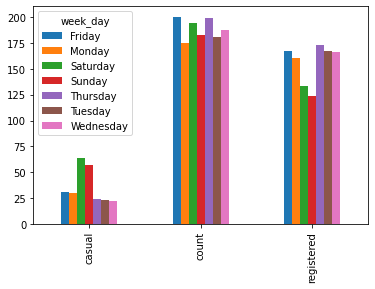

In [91]:
df_dt1.pivot_table(values=['count', 'registered','casual'] ,
                      columns='week_day',
                      aggfunc='mean').plot(kind='bar');

# METRICS AND KPIS


## Error Metrics on a naive forecast

#### With regard to the bikes dataset a ‘naive’ forecast would be to use the count from the year before to predict the next year. Use the count from May 2011 as a forecast for May 2012 and check how far off the predictions are:

#### 1. Filter the dataset for May 2011 and the count column.


In [92]:
import statsmodels.tools.eval_measures as sm

#y_forecast

y_forecast= df_dt1[['count','year','month','day_of_month']][(df_dt1['month'] == 'May') & (df_dt1['year'] == 2011)]
y_forecast

,count,year,month,day_of_month
datetime,,,,
2011-05-01 00:00:00,96,2011,May,1
2011-05-01 01:00:00,59,2011,May,1
2011-05-01 02:00:00,50,2011,May,1
2011-05-01 03:00:00,23,2011,May,1
2011-05-01 04:00:00,17,2011,May,1
...,...,...,...,...
2011-05-31 19:00:00,407,2011,May,31
2011-05-31 20:00:00,310,2011,May,31
2011-05-31 21:00:00,224,2011,May,31


#### 2. Filter the dataset for May 2012 and the count column

In [93]:
# y_actual

y_actual= df_dt1[['count','year','month','day_of_month']][(df_dt1['month'] == 'May') & (df_dt1['year'] == 2012)]
y_actual

,count,year,month,day_of_month
datetime,,,,
2012-05-01 00:00:00,35,2012,May,1
2012-05-01 01:00:00,21,2012,May,1
2012-05-01 02:00:00,8,2012,May,1
2012-05-01 03:00:00,3,2012,May,1
2012-05-01 04:00:00,8,2012,May,1
...,...,...,...,...
2012-05-31 19:00:00,420,2012,May,31
2012-05-31 20:00:00,336,2012,May,31
2012-05-31 21:00:00,249,2012,May,31


#### 3. Use the above results as the input for sm.rmse(y_forecast, y_actual)

In [94]:
sm.rmse(y_forecast['count'], y_actual['count'])

168.69935321213757

#### 4. How far off on average was this naive prediction?

##### This prediction is 168.69 units far from the actual value. 

#### Extra: Forecast vs Actual values plotting

In [95]:
forecast_day_avg = y_forecast.groupby('day_of_month')['count'].mean()
forecast_df= forecast_day_avg.to_frame()
forecast_df

,count
day_of_month,
1,139.625000
2,183.375000
3,185.458333
4,109.708333
5,184.708333
6,192.000000
7,196.416667
8,180.541667
9,181.750000


In [96]:
actual_day_avg = y_actual.groupby('day_of_month')['count'].mean()
actual_df = actual_day_avg.to_frame()
actual_df

,count
day_of_month,
1,239.166667
2,257.041667
3,267.541667
4,262.333333
5,286.791667
6,264.958333
7,261.375000
8,238.666667
9,196.541667


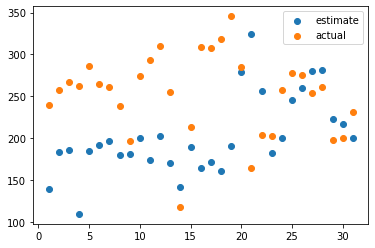

In [97]:
plt.scatter(forecast_df.index, forecast_df['count'], label='estimate')
plt.scatter(actual_df.index, actual_df['count'], label='actual')
plt.legend();

# LINEAR REGRESSION

In [98]:
import statsmodels.formula.api as sm
from sklearn.metrics import r2_score

#### 1. Load the data in a pandas dataframe
#### 2. Set the datetime column as the dataframe index

In [99]:
df_dt1

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,month_number,month,day_of_month,week_day,hour_day,season_name,rolling_mean,hour_of_day,part_of_day,date
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,...,1,January,1,Saturday,0,winter,NaN,0,night,2011-01
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,...,1,January,1,Saturday,1,winter,NaN,1,night,2011-01
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,...,1,January,1,Saturday,2,winter,NaN,2,night,2011-01
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,...,1,January,1,Saturday,3,winter,NaN,3,night,2011-01
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,...,1,January,1,Saturday,4,winter,NaN,4,night,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,...,12,December,31,Monday,19,winter,171.682,19,evening,2012-12
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,...,12,December,31,Monday,20,winter,171.764,20,evening,2012-12
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,...,12,December,31,Monday,21,winter,171.819,21,evening,2012-12


#### 3. Subset the dataframe to extract the following columns: temp, atemp, humidity, windspeed and count

In [100]:
df_dt3 = df_dt1[['temp','atemp','humidity','windspeed','count']]
df_dt3

,temp,atemp,humidity,windspeed,count
datetime,,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0000,16
2011-01-01 01:00:00,9.02,13.635,80,0.0000,40
2011-01-01 02:00:00,9.02,13.635,80,0.0000,32
2011-01-01 03:00:00,9.84,14.395,75,0.0000,13
2011-01-01 04:00:00,9.84,14.395,75,0.0000,1
...,...,...,...,...,...
2012-12-31 19:00:00,10.66,12.880,60,11.0014,156
2012-12-31 20:00:00,10.66,12.880,60,11.0014,104
2012-12-31 21:00:00,10.66,12.880,60,11.0014,67


In [101]:
df_dt3.isnull().sum()

temp         0
atemp        0
humidity     0
windspeed    0
count        0
dtype: int64

In [102]:
df_dt3.corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.987672,-0.069881,-0.023125,0.414713
atemp,0.987672,1.000000,-0.051918,-0.062336,0.411854
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.329615
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.099909
count,0.414713,0.411854,-0.329615,0.099909,1.000000


#### 4. Generate a heatmap of the subset dataframe. Which of the features has the highest correlation with the count column ?

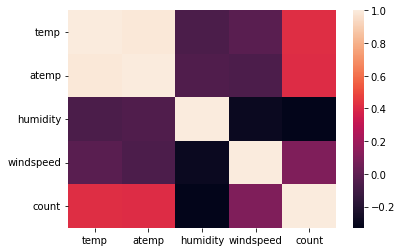

In [103]:
sns.heatmap(df_dt3.corr());

#### 5. Using that feature from step. 4, build a simple linear regression model with count as the response variable. Calculate R2.

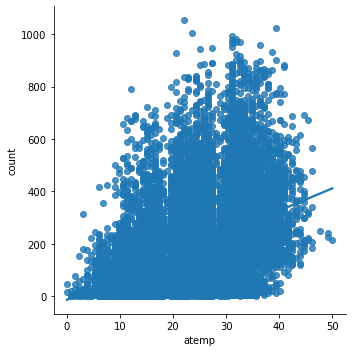

In [104]:
sns.lmplot(x='atemp', y='count', data=df_dt3, ci=None, legend = True);

#### 5.1 Building a linear regression model using one independent variable:

In [105]:
model1 = sm.ols(formula='count ~ atemp', data=df_dt3).fit()

In [106]:
model1.rsquared_adj

0.16957623553894396

In [107]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     3550.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:44   Log-Likelihood:            -1.1306e+05
No. Observations:               17379   AIC:                         2.261e+05
Df Residuals:                   17377   BIC:                         2.261e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.9114      3.614     -3.849      0.000     -20.996      -6.827
atemp          8.5134      0.143     59.579      0.000       8.233       8.794
==============================================================================
Omnibus:                     3035.450   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5369.553
Skew:                           1.124   Prob(JB):                         0.00
Kurtosis:                       4.538   Cond. No.                         74.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# Assume y is the actual value and f is the predicted values

y = df_dt3['atemp']
f = df_dt3['count']

R_square = r2_score(y, f) 
R_square

-778.2440409261103

#### 6. Add an additional feature from the subset dataframe and repeat step 5. Observe how the value R2 changed. How can this change be explained ?

In [109]:
model2 = sm.ols(formula='count ~ atemp + temp', data=df_dt3).fit()

In [110]:
model2.rsquared_adj

0.17209913556328493

In [111]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     1807.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:44   Log-Likelihood:            -1.1303e+05
No. Observations:               17379   AIC:                         2.261e+05
Df Residuals:                   17376   BIC:                         2.261e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0860      3.803     -1.337      0.181     -12.541       2.369
atemp          1.9011      0.911      2.086      0.037       0.115       3.688
temp           7.2866      0.992      7.345      0.000       5.342       9.231
==============================================================================
Omnibus:                     3030.218   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5360.929
Skew:                           1.122   Prob(JB):                         0.00
Kurtosis:                       4.539   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The R2 improves a bit because we are adding more variables to explain the variation on the dependent variable. 

#### 7. Add the remaining two features and repeat step 6. Does the model get better when atemp is added as a feature ? why ?

In [112]:
model3 = sm.ols(formula='count ~ atemp + temp + humidity', data=df_dt3).fit()

In [113]:
model3.rsquared_adj

0.26495883334221737

In [114]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     2089.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:44   Log-Likelihood:            -1.1200e+05
No. Observations:               17379   AIC:                         2.240e+05
Df Residuals:                   17375   BIC:                         2.240e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    173.8944      5.237     33.203      0.000     163.629     184.160
atemp          6.3356      0.864      7.333      0.000       4.642       8.029
temp           2.0363      0.941      2.163      0.031       0.191       3.882
humidity      -2.8298      0.060    -46.863      0.000      -2.948      -2.711
==============================================================================
Omnibus:                     3408.682   Durbin-Watson:                   0.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6689.889
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       4.889   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
model4 = sm.ols(formula='count ~ atemp + temp + humidity + windspeed', data=df_dt3).fit()

In [116]:
model4.rsquared_adj

0.266096124721964

In [117]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     1576.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:44   Log-Likelihood:            -1.1199e+05
No. Observations:               17379   AIC:                         2.240e+05
Df Residuals:                   17374   BIC:                         2.240e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    155.2151      6.315     24.578      0.000     142.837     167.594
atemp          7.4229      0.888      8.364      0.000       5.683       9.162
temp           0.9024      0.965      0.935      0.350      -0.989       2.794
humidity      -2.7384      0.063    -43.631      0.000      -2.861      -2.615
windspeed      0.8002      0.151      5.284      0.000       0.503       1.097
==============================================================================
Omnibus:                     3423.472   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6737.500
Skew:                           1.194   Prob(JB):                         0.00
Kurtosis:                       4.897   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
model5 = sm.ols(formula='count ~ temp + humidity + windspeed', data=df_dt3).fit()

In [119]:
model5.rsquared_adj

0.2631837757241343

In [120]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     2070.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:44   Log-Likelihood:            -1.1202e+05
No. Observations:               17379   AIC:                         2.240e+05
Df Residuals:                   17375   BIC:                         2.241e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    171.7485      6.010     28.578      0.000     159.969     183.528
temp           8.8781      0.147     60.393      0.000       8.590       9.166
humidity      -2.7182      0.063    -43.255      0.000      -2.841      -2.595
windspeed      0.5066      0.148      3.433      0.001       0.217       0.796
==============================================================================
Omnibus:                     3440.799   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6763.914
Skew:                           1.201   Prob(JB):                         0.00
Kurtosis:                       4.891   Cond. No.                         361.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The model gets better because we are including more independent variables to explain the variation of the dependent variable.


#### 8. What additional features can be added to improve the fit of the model ?

In [121]:
# Adding the columns 'casual' and 'registered' to the data frame.

df_dt4 = df_dt1[['temp','atemp','humidity','windspeed','count', 'casual','registered']]
df_dt4

,temp,atemp,humidity,windspeed,count,casual,registered
datetime,,,,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0000,16,3.0,13.0
2011-01-01 01:00:00,9.02,13.635,80,0.0000,40,8.0,32.0
2011-01-01 02:00:00,9.02,13.635,80,0.0000,32,5.0,27.0
2011-01-01 03:00:00,9.84,14.395,75,0.0000,13,3.0,10.0
2011-01-01 04:00:00,9.84,14.395,75,0.0000,1,0.0,1.0
...,...,...,...,...,...,...,...
2012-12-31 19:00:00,10.66,12.880,60,11.0014,156,NaN,NaN
2012-12-31 20:00:00,10.66,12.880,60,11.0014,104,NaN,NaN
2012-12-31 21:00:00,10.66,12.880,60,11.0014,67,NaN,NaN


In [122]:
df_dt4.corr()

,temp,atemp,humidity,windspeed,count,casual,registered
temp,1.000000,0.987672,-0.069881,-0.023125,0.414713,0.467097,0.318571
atemp,0.987672,1.000000,-0.051918,-0.062336,0.411854,0.462067,0.314635
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.329615,-0.348187,-0.265458
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.099909,0.092276,0.091052
count,0.414713,0.411854,-0.329615,0.099909,1.000000,0.690414,0.970948
casual,0.467097,0.462067,-0.348187,0.092276,0.690414,1.000000,0.497250
registered,0.318571,0.314635,-0.265458,0.091052,0.970948,0.497250,1.000000


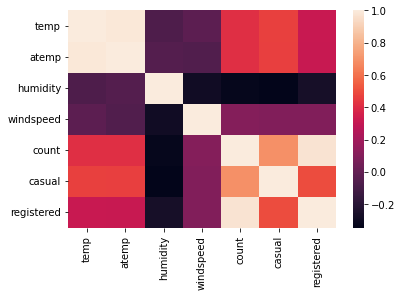

In [123]:
sns.heatmap(df_dt4.corr());

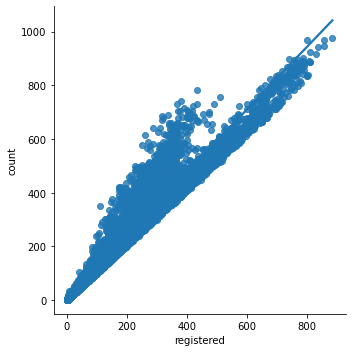

In [124]:
sns.lmplot(x='registered', y='count', data=df_dt4, ci=None, legend = True);

In [125]:
model6 = sm.ols(formula='count ~ registered', data=df_dt4).fit()

In [126]:
model6.rsquared_adj

0.9427349632628097

In [127]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 1.792e+05
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:45   Log-Likelihood:                -56478.
No. Observations:               10886   AIC:                         1.130e+05
Df Residuals:                   10884   BIC:                         1.130e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4368      0.596     17.499      0.000       9.268      11.606
registered     1.1645      0.003    423.317      0.000       1.159       1.170
==============================================================================
Omnibus:                     5573.093   Durbin-Watson:                   0.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42958.592
Skew:                           2.353   Prob(JB):                         0.00
Kurtosis:                      11.518   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

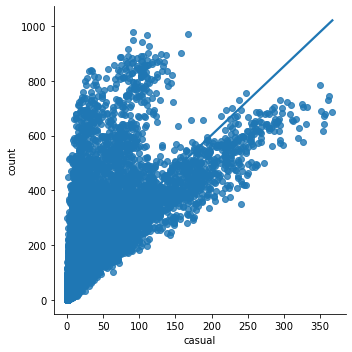

In [128]:
sns.lmplot(x='casual', y='count', data=df_dt4, ci=None, legend = True);

In [129]:
model7 = sm.ols(formula='count ~ casual', data=df_dt4).fit()

In [130]:
model7.rsquared_adj

0.47662280876530105

In [131]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     9914.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:45   Log-Likelihood:                -68521.
No. Observations:               10886   AIC:                         1.370e+05
Df Residuals:                   10884   BIC:                         1.371e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.4014      1.548     65.484      0.000      98.366     104.437
casual         2.5033      0.025     99.567      0.000       2.454       2.553
==============================================================================
Omnibus:                     4113.993   Durbin-Watson:                   0.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14782.482
Skew:                           1.920   Prob(JB):                         0.00
Kurtosis:                       7.225   Cond. No.                         75.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion:

#### By including 'Registered' variable as a predictor of 'count' the model fit significantly improves (model6- rsquared_adj= 0.9427349632628097 vs model7 'casual' independent variable- rsquared_adj=0.47662280876530105).

## Now let's see what other variables together with 'Registered' make the model even better.

In [132]:
model8 = sm.ols(formula='count ~ registered + temp ', data=df_dt4).fit()

In [133]:
model8.rsquared_adj

0.9507982826086078

In [134]:
model8.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 1.052e+05
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:45   Log-Likelihood:                -55651.
No. Observations:               10886   AIC:                         1.113e+05
Df Residuals:                   10883   BIC:                         1.113e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.4985      1.075    -26.517      0.000     -30.605     -26.392
registered     1.1283      0.003    419.436      0.000       1.123       1.134
temp           2.2029      0.052     42.246      0.000       2.101       2.305
==============================================================================
Omnibus:                     5989.520   Durbin-Watson:                   0.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54508.396
Skew:                           2.513   Prob(JB):                         0.00
Kurtosis:                      12.742   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
model9 = sm.ols(formula='count ~ registered + atemp', data=df_dt4).fit()

In [136]:
model9.rsquared_adj

0.9506165390096396

#### Conclusion:
    
#### By adding individually the variables 'temp' (model8) and 'atemp' (model9) to the 'registered' variable together in one model, 'temp' variable has a higher impact on making the model fit better. 

#### model6 (only 'registered' variable) = 0.9427349632628097
#### model8 rsquared_adj = 0.9507982826086078
#### model9 rsquared_adj = 0.9506165390096396

### Now let's see what other variables together with "registered" and "temp" make the model even better.

In [137]:
model10 = sm.ols(formula='count ~ registered + temp + atemp', data=df_dt4).fit()

In [138]:
model10.rsquared_adj

0.9508008381783969

In [139]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 1.052e+05
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:46   Log-Likelihood:                -55651.
No. Observations:               10886   AIC:                         1.113e+05
Df Residuals:                   10883   BIC:                         1.113e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.4985      1.075    -26.517      0.000     -30.605     -26.392
registered     1.1283      0.003    419.436      0.000       1.123       1.134
temp           2.2029      0.052     42.246      0.000       2.101       2.305
==============================================================================
Omnibus:                     5989.520   Durbin-Watson:                   0.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54508.396
Skew:                           2.513   Prob(JB):                         0.00
Kurtosis:                      12.742   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
#Including 'humidity'

model11 = sm.ols(formula='count ~ registered + temp + humidity', data=df_dt4).fit()

In [141]:
model11.rsquared_adj

0.9548637017042095

In [142]:
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 7.676e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:46   Log-Likelihood:                -55181.
No. Observations:               10886   AIC:                         1.104e+05
Df Residuals:                   10882   BIC:                         1.104e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.7333      1.671      7.620      0.000       9.458      16.009
registered     1.1067      0.003    414.897      0.000       1.101       1.112
temp           2.2365      0.050     44.770      0.000       2.139       2.334
humidity      -0.6229      0.020    -31.325      0.000      -0.662      -0.584
==============================================================================
Omnibus:                     5978.794   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53758.226
Skew:                           2.512   Prob(JB):                         0.00
Kurtosis:                      12.658   Cond. No.                     1.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
# Including 'windspeed'
model12 = sm.ols(formula='count ~ registered + temp + windspeed', data=df_dt4).fit()

In [144]:
model12.rsquared_adj

0.9510999980010728

In [145]:
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 7.057e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:46   Log-Likelihood:                -55617.
No. Observations:               10886   AIC:                         1.112e+05
Df Residuals:                   10882   BIC:                         1.113e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.5723      1.235    -27.180      0.000     -35.994     -31.151
registered     1.1260      0.003    417.688      0.000       1.121       1.131
temp           2.2242      0.052     42.733      0.000       2.122       2.326
windspeed      0.3903      0.047      8.255      0.000       0.298       0.483
==============================================================================
Omnibus:                     6012.214   Durbin-Watson:                   0.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54982.716
Skew:                           2.524   Prob(JB):                         0.00
Kurtosis:                      12.785   Cond. No.                         701.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion: By adding 'humidty' to the current model with 2 independent variables 'registered' and 'temp'(model8 rsquared_adj = 0.9507982826086078), the model fit registers a slight improvement than the other two variables (model11- rsquared= 0.9548637017042095).


#### model10=  Independent variables: registered + temp + atemp - rsquared_adj = 0.9508008381783969
#### model11=  Independent variables: registered + temp + humidity - rsquared_adj = 0.9548637017042095
#### model12 rsquared_adj = Independent variables: registered + temp + windspeed - rsquared_adj = 0.9510999980010728

### Now let's see what other variables together with 'registered' + 'temp' + 'humidity' make the model even better.

In [146]:
#Including 'atemp'

model13 = sm.ols(formula='count ~ registered + temp + humidity + atemp', data=df_dt4).fit()

In [147]:
model13.rsquared_adj

0.954973139258559

In [148]:
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 5.772e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:46   Log-Likelihood:                -55168.
No. Observations:               10886   AIC:                         1.103e+05
Df Residuals:                   10881   BIC:                         1.104e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9645      1.703      6.439      0.000       7.627      14.302
registered     1.1061      0.003    414.914      0.000       1.101       1.111
temp           0.8150      0.276      2.954      0.003       0.274       1.356
humidity      -0.6359      0.020    -31.770      0.000      -0.675      -0.597
atemp          1.3280      0.253      5.239      0.000       0.831       1.825
==============================================================================
Omnibus:                     5945.209   Durbin-Watson:                   0.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52974.404
Skew:                           2.497   Prob(JB):                         0.00
Kurtosis:                      12.584   Cond. No.                     1.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
#Including 'windspeed'

model14 = sm.ols(formula='count ~ registered + temp + humidity + windspeed', data=df_dt4).fit()

In [150]:
model14.rsquared_adj

0.954864078923544

In [151]:
model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 5.757e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:46   Log-Likelihood:                -55181.
No. Observations:               10886   AIC:                         1.104e+05
Df Residuals:                   10881   BIC:                         1.104e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8231      1.970      7.017      0.000       9.962      17.685
registered     1.1067      0.003    414.830      0.000       1.101       1.112
temp           2.2341      0.050     44.677      0.000       2.136       2.332
humidity      -0.6296      0.021    -30.141      0.000      -0.671      -0.589
windspeed     -0.0498      0.048     -1.044      0.296      -0.143       0.044
==============================================================================
Omnibus:                     5975.914   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53688.573
Skew:                           2.511   Prob(JB):                         0.00
Kurtosis:                      12.651   Cond. No.                     1.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Conclusion: By adding 'atemp' to the current model with 3 independent variables 'registered' + 'temp' + 'humidity' (model11 rsquared_adj = 0.9548637017042095), the model fit registers a slight improvement than the model with the variable 'windspeed' (model13- rsquared= 0.954973139258559).


#### model13=  Independent variables: registered + temp + humidity + atemp - rsquared_adj = 0.954973139258559
#### model14 rsquared_adj = Independent variables: registered + temp + humidity + windspeed - rsquared_adj = 0.954864078923544

### Now let's see what happens when all the independent variables are included: 'registered' + 'temp' + 'humidity' + 'atemp' + 'windspeed':

In [152]:
#Including 'windspeed'

model15 = sm.ols(formula='count ~ registered + temp + humidity + windspeed', data=df_dt4).fit()

In [153]:
model15.rsquared

0.9548806653897182

In [154]:
model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 5.757e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:46   Log-Likelihood:                -55181.
No. Observations:               10886   AIC:                         1.104e+05
Df Residuals:                   10881   BIC:                         1.104e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8231      1.970      7.017      0.000       9.962      17.685
registered     1.1067      0.003    414.830      0.000       1.101       1.112
temp           2.2341      0.050     44.677      0.000       2.136       2.332
humidity      -0.6296      0.021    -30.141      0.000      -0.671      -0.589
windspeed     -0.0498      0.048     -1.044      0.296      -0.143       0.044
==============================================================================
Omnibus:                     5975.914   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53688.573
Skew:                           2.511   Prob(JB):                         0.00
Kurtosis:                      12.651   Cond. No.                     1.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Conclusion: 


#### model13=  Independent variables: registered + temp + humidity + atemp - rsquared_adj = 0.954973139258559

#### vs

#### model15 (including all the 5 independent variables)=  Independent variables: registered + temp + humidity + atemp + windspeed - rsquared_adj = 0.9548806653897182

#### By including the extra variable 'windspeed', the rsquared_adj does not improve.


# BONUS

#### Use features that were extracted and binned in the datetime lesson to improve the r² score even further.

In [155]:
df_dt1

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,month_number,month,day_of_month,week_day,hour_day,season_name,rolling_mean,hour_of_day,part_of_day,date
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,...,1,January,1,Saturday,0,winter,NaN,0,night,2011-01
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,...,1,January,1,Saturday,1,winter,NaN,1,night,2011-01
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,...,1,January,1,Saturday,2,winter,NaN,2,night,2011-01
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,...,1,January,1,Saturday,3,winter,NaN,3,night,2011-01
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,...,1,January,1,Saturday,4,winter,NaN,4,night,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,...,12,December,31,Monday,19,winter,171.682,19,evening,2012-12
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,...,12,December,31,Monday,20,winter,171.764,20,evening,2012-12
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,...,12,December,31,Monday,21,winter,171.819,21,evening,2012-12


In [156]:
df_dt1['season'].unique()

array([1, 2, 3, 4])

#### Bin 1: Seasons


In [157]:
df_dt1['month_number'].replace({1:8, 2:9, 3:10, 4:11, 5:12,6:1, 7:2, 8:3, 9:4, 10:5,11:6,12:7},inplace = True)

In [158]:
df_dt1

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,month_number,month,day_of_month,week_day,hour_day,season_name,rolling_mean,hour_of_day,part_of_day,date
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,...,8,January,1,Saturday,0,winter,NaN,0,night,2011-01
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,...,8,January,1,Saturday,1,winter,NaN,1,night,2011-01
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,...,8,January,1,Saturday,2,winter,NaN,2,night,2011-01
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,...,8,January,1,Saturday,3,winter,NaN,3,night,2011-01
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,...,8,January,1,Saturday,4,winter,NaN,4,night,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,...,7,December,31,Monday,19,winter,171.682,19,evening,2012-12
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,...,7,December,31,Monday,20,winter,171.764,20,evening,2012-12
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,...,7,December,31,Monday,21,winter,171.819,21,evening,2012-12


In [159]:
season_labels = ['summer', 'autumn', 'winter','spring']
bin_boundaries = [0.9, 3, 6,9, 12.1]

#time_labels = ['evening_2','morning', 'afternoon', 'evening']
#bin_boundaries = [-0.1, 4.9, 12, 18, 23.9]

In [160]:
pd.cut(df_dt1['month_number'], bins=bin_boundaries, labels=season_labels).sample(23)

datetime
2012-06-12 04:00:00    summer
2011-08-29 15:00:00    summer
2011-09-23 01:00:00    autumn
2012-08-25 03:00:00    summer
2012-08-08 18:00:00    summer
2012-08-17 06:00:00    summer
2012-04-03 17:00:00    spring
2011-05-06 19:00:00    spring
2011-08-12 22:00:00    summer
2012-04-22 14:00:00    spring
2011-12-25 17:00:00    winter
2012-10-17 02:00:00    autumn
2011-10-26 22:00:00    autumn
2011-06-21 12:00:00    summer
2012-07-27 19:00:00    summer
2011-01-25 11:00:00    winter
2012-05-07 18:00:00    spring
2011-09-08 15:00:00    autumn
2012-08-29 12:00:00    summer
2011-01-21 10:00:00    winter
2011-04-12 12:00:00    spring
2012-01-13 20:00:00    winter
2011-10-02 11:00:00    autumn
Name: month_number, dtype: category
Categories (4, object): ['summer' < 'autumn' < 'winter' < 'spring']

In [161]:
#General Model:

model5 = sm.ols(formula='count ~ temp + humidity + windspeed', data=df_dt1).fit()

In [162]:
model5.rsquared_adj   

0.2631837757241343

In [163]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     2070.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:46   Log-Likelihood:            -1.1202e+05
No. Observations:               17379   AIC:                         2.240e+05
Df Residuals:                   17375   BIC:                         2.241e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    171.7485      6.010     28.578      0.000     159.969     183.528
temp           8.8781      0.147     60.393      0.000       8.590       9.166
humidity      -2.7182      0.063    -43.255      0.000      -2.841      -2.595
windspeed      0.5066      0.148      3.433      0.001       0.217       0.796
==============================================================================
Omnibus:                     3440.799   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6763.914
Skew:                           1.201   Prob(JB):                         0.00
Kurtosis:                       4.891   Cond. No.                         361.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
model16 = sm.ols(formula='count ~ temp + humidity + windspeed + season', data=df_dt1).fit()

In [165]:
model16.rsquared_adj 

0.2799035552356087

In [166]:
model16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     1690.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:46   Log-Likelihood:            -1.1182e+05
No. Observations:               17379   AIC:                         2.237e+05
Df Residuals:                   17374   BIC:                         2.237e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    143.9417      6.100     23.597      0.000     131.985     155.898
temp           7.8760      0.154     51.265      0.000       7.575       8.177
humidity      -2.9026      0.063    -46.221      0.000      -3.026      -2.779
windspeed      0.8105      0.147      5.525      0.000       0.523       1.098
season        22.3537      1.112     20.110      0.000      20.175      24.532
==============================================================================
Omnibus:                     3332.503   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6434.692
Skew:                           1.174   Prob(JB):                         0.00
Kurtosis:                       4.836   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion: By adding 'season' the R2 improves from 0.2631837757241343 to 0.2799035552356087

#### Bin 2: Holiday

In [167]:
model17 = sm.ols(formula='count ~ temp + humidity + windspeed + holiday', data=df_dt1).fit()

In [168]:
model17.rsquared_adj

0.26317777618214466

In [169]:
model17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     1553.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:47   Log-Likelihood:            -1.1202e+05
No. Observations:               17379   AIC:                         2.241e+05
Df Residuals:                   17374   BIC:                         2.241e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    172.0558      6.019     28.586      0.000     160.258     183.854
temp           8.8743      0.147     60.343      0.000       8.586       9.163
humidity      -2.7189      0.063    -43.262      0.000      -2.842      -2.596
windspeed      0.5066      0.148      3.432      0.001       0.217       0.796
holiday       -6.4134      6.922     -0.927      0.354     -19.981       7.154
==============================================================================
Omnibus:                     3435.591   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6746.160
Skew:                           1.200   Prob(JB):                         0.00
Kurtosis:                       4.887   Cond. No.                         418.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion: By adding 'holiday' the R2 does not improve, it actually decreases from 0.2631837757241343 to 0.26317777618214466.

#### Bin 3: workingday

In [170]:
model18 = sm.ols(formula='count ~ temp + humidity + windspeed + workingday', data=df_dt1).fit()

In [171]:
model18.rsquared_adj

0.26328901250031733

In [172]:
model18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     1554.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:47   Log-Likelihood:            -1.1202e+05
No. Observations:               17379   AIC:                         2.240e+05
Df Residuals:                   17374   BIC:                         2.241e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    174.4944      6.187     28.204      0.000     162.368     186.621
temp           8.8936      0.147     60.407      0.000       8.605       9.182
humidity      -2.7162      0.063    -43.219      0.000      -2.839      -2.593
windspeed      0.5052      0.148      3.423      0.001       0.216       0.794
workingday    -4.6446      2.489     -1.866      0.062      -9.523       0.234
==============================================================================
Omnibus:                     3475.949   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6889.521
Skew:                           1.208   Prob(JB):                         0.00
Kurtosis:                       4.918   Cond. No.                         374.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion: By adding 'workingday' the R2 improves from 0.2631837757241343 to 0.26328901250031733.

#### Bin 4: weather

In [173]:
model19 = sm.ols(formula='count ~ temp + humidity + windspeed + weather', data=df_dt1).fit()

In [174]:
model19.rsquared_adj

0.26357418592794923

In [175]:
model18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     1554.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:47   Log-Likelihood:            -1.1202e+05
No. Observations:               17379   AIC:                         2.240e+05
Df Residuals:                   17374   BIC:                         2.241e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    174.4944      6.187     28.204      0.000     162.368     186.621
temp           8.8936      0.147     60.407      0.000       8.605       9.182
humidity      -2.7162      0.063    -43.219      0.000      -2.839      -2.593
windspeed      0.5052      0.148      3.423      0.001       0.216       0.794
workingday    -4.6446      2.489     -1.866      0.062      -9.523       0.234
==============================================================================
Omnibus:                     3475.949   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6889.521
Skew:                           1.208   Prob(JB):                         0.00
Kurtosis:                       4.918   Cond. No.                         374.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion: By adding 'weather' the R2 improves from 0.2631837757241343 to 0.26357418592794923.

#### Bin 5: month

In [176]:
model20 = sm.ols(formula='count ~ temp + humidity + windspeed + month', data=df_dt1).fit()

In [177]:
model20.rsquared_adj

0.3145467845913199

In [178]:
model20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     570.6
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:47   Log-Likelihood:            -1.1139e+05
No. Observations:               17379   AIC:                         2.228e+05
Df Residuals:                   17364   BIC:                         2.229e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             76.8314      8.828      8.704      0.000      59.529      94.134
month[T.August]      -86.9885      6.243    -13.933      0.000     -99.226     -74.751
month[T.December]     63.1810      5.710     11.066      0.000      51.990      74.372
month[T.February]     18.4483      5.956      3.097      0.002       6.774      30.123
month[T.January]      32.1674      6.166      5.217      0.000      20.081      44.253
month[T.July]       -115.5691      6.497    -17.787      0.000    -128.305    -102.834
month[T.June]        -60.8733      6.086    -10.003      0.000     -72.801     -48.945
month[T.March]        -0.1440      5.534     -0.026      0.979     -10.992      10.704
month[T.May]          -2.1191      5.733     -0.370      0.712     -13.357       9.118
month[T.November]     75.8420      5.621     13.494      0.000      64.825      86.859
month[T.October]      58.3033      5.537     10.530      0.000      47.450      69.156
month[T.September]    -2.4221      5.901     -0.410      0.681     -13.988       9.144
temp                  14.0245      0.293     47.802      0.000      13.449      14.600
humidity              -2.7973      0.064    -43.894      0.000      -2.922      -2.672
windspeed              0.2814      0.144      1.950      0.051      -0.002       0.564
==============================================================================
Omnibus:                     3421.830   Durbin-Watson:                   0.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6776.915
Skew:                           1.190   Prob(JB):                         0.00
Kurtosis:                       4.922   Cond. No.                         880.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion: By adding 'month' the R2 significantly improves from 0.2631837757241343 to 0.3145467845913199.

#### Bin 6: week_day

In [179]:
model21 = sm.ols(formula='count ~ temp + humidity + windspeed + week_day', data=df_dt1).fit()

In [180]:
model21.rsquared_adj

0.2644488661422687

In [181]:
model21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     695.2
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:47   Log-Likelihood:            -1.1200e+05
No. Observations:               17379   AIC:                         2.240e+05
Df Residuals:                   17369   BIC:                         2.241e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               178.4819      6.570     27.167      0.000     165.604     191.359
week_day[T.Monday]      -18.8416      4.326     -4.356      0.000     -27.321     -10.363
week_day[T.Saturday]      0.5467      4.311      0.127      0.899      -7.904       8.997
week_day[T.Sunday]       -9.0420      4.315     -2.096      0.036     -17.500      -0.584
week_day[T.Thursday]     -6.4427      4.328     -1.489      0.137     -14.925       2.040
week_day[T.Tuesday]     -16.8968      4.340     -3.894      0.000     -25.403      -8.391
week_day[T.Wednesday]    -8.0019      4.330     -1.848      0.065     -16.490       0.486
temp                      8.8988      0.147     60.495      0.000       8.610       9.187
humidity                 -2.7009      0.063    -42.918      0.000      -2.824      -2.578
windspeed                 0.5152      0.148      3.492      0.000       0.226       0.804
==============================================================================
Omnibus:                     3487.753   Durbin-Watson:                   0.418
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6931.511
Skew:                           1.210   Prob(JB):                         0.00
Kurtosis:                       4.927   Cond. No.                         532.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion: By adding 'week_day' the R2 improves from 0.2631837757241343 to 0.2644488661422687.

#### Bin 7: hour_day

In [182]:
model22 = sm.ols(formula='count ~ temp + humidity + windspeed + hour_day', data=df_dt1).fit()

In [183]:
model22.rsquared_adj

0.3393606759679003

In [184]:
model22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     2233.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:18:47   Log-Likelihood:            -1.1107e+05
No. Observations:               17379   AIC:                         2.222e+05
Df Residuals:                   17374   BIC:                         2.222e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.7561      6.163     10.669      0.000      53.675      77.837
temp           8.0829      0.140     57.600      0.000       7.808       8.358
humidity      -2.0551      0.061    -33.515      0.000      -2.175      -1.935
windspeed      0.0788      0.140      0.562      0.574      -0.196       0.353
hour_day       7.4529      0.166     44.771      0.000       7.127       7.779
==============================================================================
Omnibus:                     4281.807   Durbin-Watson:                   0.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10060.419
Skew:                           1.384   Prob(JB):                         0.00
Kurtosis:                       5.497   Cond. No.                         396.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion: By adding 'hour_day' the R2 significantly improves from 0.2631837757241343 to 0.3393606759679003.

#### Bin 7: part_of_day


In [185]:
model23 = sm.ols(formula='count ~ temp + humidity + windspeed + part_of_day', data=df_dt1).fit()

In [186]:
model23.rsquared_adj

0.43620237700361386

#### Conclusion: By adding 'hour_day' the R2 significantly improves from 0.2631837757241343 to 0.43620237700361386.

### Now let's run a model including the variables that caused the highest impact on the rsquared_adj: 'month'+ 'hour_day' + 'part_of_day' + 'season_name'

In [187]:
model24 = sm.ols(formula='count ~ temp + humidity + windspeed + hour_day + part_of_day + season_name', data=df_dt1).fit()

In [188]:
model24.rsquared_adj

0.4716523303909512

#### Conclusion: By adding three datetime variables ('month' + 'hour_day' + 'part_of_day' + 'season_name) the R2 significantly improves from 0.2631837757241343 to 0.4716523303909512 (this is the best Adjusted R Squared).

# DISTRIBUTION FUNCTIONS

#### 1. Filter bike data for one day

In [189]:
df_dt1
june1_df = df_dt1.loc['2011-06-01']

#### 2. Using sns.displot() plot the distribution of the count during that day (Try setting the parameter kde=True). More info on this plotting function here: displot

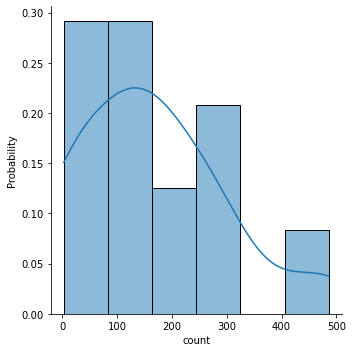

In [190]:
sns.displot(june1_df['count'], kde=True, stat="probability");

#### 3. Filter bike data for the year 2011

In [191]:
year2011_df = df_dt1.loc['2011']

#### 4. Again using sns.displot() plot the distribution of the temperature of the entire year.

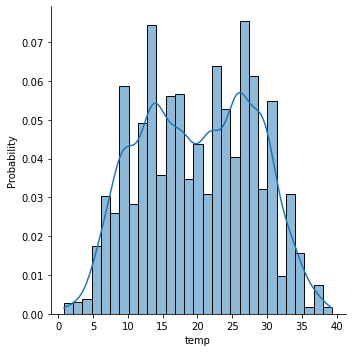

In [192]:
sns.displot(year2011_df['temp'], kde=True, stat="probability");

## Coin Flips

In [193]:
import numpy as np

#### 1. Simulate a fair coin flip for 10 times and calculate the estimated probability of getting a head (number of times you got a head divided by 10). Repeat for 100, 1000 and 10000 times. How does the estimated probability changes ? How can we interpret that ?

In [194]:
n_all_heads = 0  

for i in range(10):
    heads = np.random.random(size=1) > 0.5
    n_heads = np.sum(heads)
    if n_heads == 1:
        n_all_heads += 1

prob = n_all_heads/10

print(f"Probability of getting at least 1 head in 10 fair coin tosses = {prob}")

Probability of getting at least 1 head in 10 fair coin tosses = 0.5


In [195]:
n_all_heads = 0  

for i in range(100):
    heads = np.random.random(size=1) > 0.5
    n_heads = np.sum(heads)
    if n_heads == 1:
        n_all_heads += 100

prob = n_all_heads/100

print(f"Probability of getting at least 1 head in 100 fair coin tosses = {prob}")

Probability of getting at least 1 head in 100 fair coin tosses = 45.0


In [196]:
n_all_heads = 0  

for i in range(1000):
    heads = np.random.random(size=1) > 0.5
    n_heads = np.sum(heads)
    if n_heads == 1:
        n_all_heads += 1

prob = n_all_heads/1000

print(f"Probability of getting at least 1 head in 1000 fair coin tosses = {prob}")

Probability of getting at least 1 head in 1000 fair coin tosses = 0.489


In [197]:
n_all_heads = 0  

for i in range(10000):
    heads = np.random.random(size=1) > 0.5
    n_heads = np.sum(heads)
    if n_heads == 1:
        n_all_heads += 1

prob = n_all_heads/10000

print(f"Probability of getting at least 1 head in 100 fair coin tosses = {prob}")

Probability of getting at least 1 head in 100 fair coin tosses = 0.5093


#### 2. Plot the pmf of the Binomial distribution of n = 10 and p = 0.5. (hint: start by sampling from the distribution for 100_000 times)

In [198]:
# n = 10

np.random.seed(42)

n_tails = np.random.binomial(10, 0.5, size=1_000_000)

# plotting the pmf using the samples
n_tails = pd.Series(n_tails)

In [199]:
n_tails.value_counts()

5     245968
6     205493
4     205347
3     117067
7     116929
8      44218
2      43515
9       9768
1       9716
0       1000
10       979
dtype: int64

In [200]:
probabilities = n_tails.value_counts(normalize=True)

probabilities

5     0.245968
6     0.205493
4     0.205347
3     0.117067
7     0.116929
8     0.044218
2     0.043515
9     0.009768
1     0.009716
0     0.001000
10    0.000979
dtype: float64

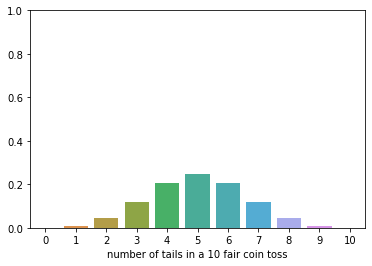

In [201]:
sns.barplot(x = probabilities.index, y = probabilities.values)
plt.xlabel("number of tails in a 10 fair coin toss")
plt.ylim([0.0, 1.0])

plt.show()

### 3. Research other commonly used probability distributions and the random real life processes and events they are used to model.

In [202]:
# poisson distribution: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

# Confidence Intervals

#### For the bikes data set, calculate the 95% confidence intervals for the mean of the windspeed feature using bootstrapping.

#### 1. Initialize empty list called sample_means()

In [222]:
sample_means = []

#### 2. Create for that will loop 10,000 times
#### 3. In each iteration using the pandas method .sample() sample 100 windspeeds with replacement
#### 4. Also in that same iteration take the mean of these 100 samples and then append it to the sample_meanslist

In [221]:
df_dt1['windspeed'].sample(n=100, replace='True').mean()

13.700361000000017

In [223]:
for i in range(10_000):
    bootstrap_sample = df_dt1['windspeed'].sample(n=100, replace='True')
    sample_means.append(bootstrap_sample.mean())

#### 5. Using sns.displot plot the distribution of the sample_means list

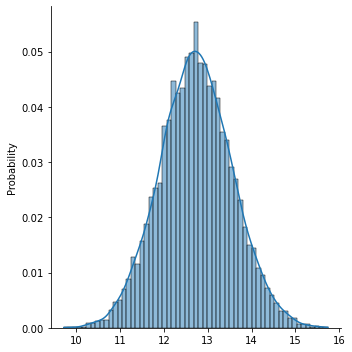

In [224]:
sns.displot(sample_means, kde=True, stat="probability");

#### 6. Convert sample_means list to pandas Series

In [229]:
sample_means = pd.Series(sample_means)

#### 7. Using pandas .quantile() calculation the upper (0.975) and lower (0.025) limits of the confidence interval of the sample_meanslist

In [230]:
alpha = 0.95

lower_quantile = (1-alpha)/2  

upper_qunatile = alpha + ((1-alpha)/2)

In [231]:
lower_limit = sample_means.quantile(lower_quantile)

upper_limit = sample_means.quantile(upper_qunatile)

print(f'confidence interval of the average windspeed is between {lower_limit} and {upper_limit}')

confidence interval of the average windspeed is between 11.130574325000005 and 14.370026000000005
